In [23]:
DATA_PATH = "../data/retail_sales_dataset.csv"
import sys
sys.path.append('../src')
import pandas_helper
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

print(f"Intentando leer archivo desde: {DATA_PATH}")
df = pandas_helper.read_csv_data(DATA_PATH)

df = pandas_helper.clean_data(df)

df = pandas_helper.change_data_type(df, ["customer_id", "gender", "product_category"], "string")

df = pandas_helper.change_data_type(df, ["transaction_id", "age", "quantity", "total_amount", "price_per_unit"], "int64")

df['date'] = pd.to_datetime(df['date'])

Intentando leer archivo desde: ../data/retail_sales_dataset.csv


## Exploración de Datos Avanzada 
Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   string        
 3   gender            1000 non-null   string        
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   string        
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), string(3)
memory usage: 70.4 KB


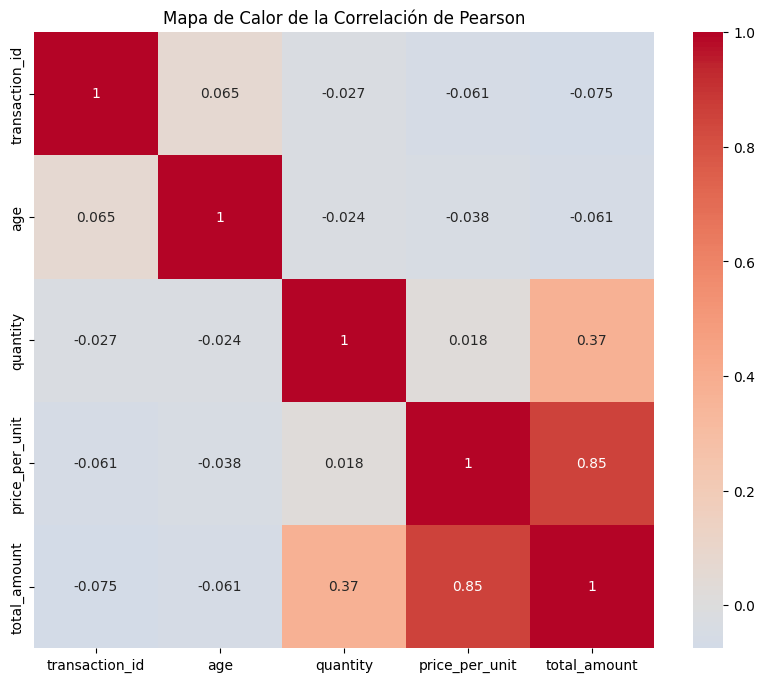

In [25]:
df = df[['transaction_id', 'age', 'quantity', 'price_per_unit', 'total_amount']]
correlation_matrix = df.corr(method='pearson')

# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

Del mapa de calor se observa que para las variables "transaction_id" y  "age" no existen relaciones interesantes con las demás variables. Se observa una relación directa entre "quantity" y "total_amount", lo cual tiene sentido ya que hay la cantidad de elementos comprados no importa mucho si no se tiene en cuenta la variable del precio. Además se observa una fuerte relación entre "price_per_unit" y "total_amount".

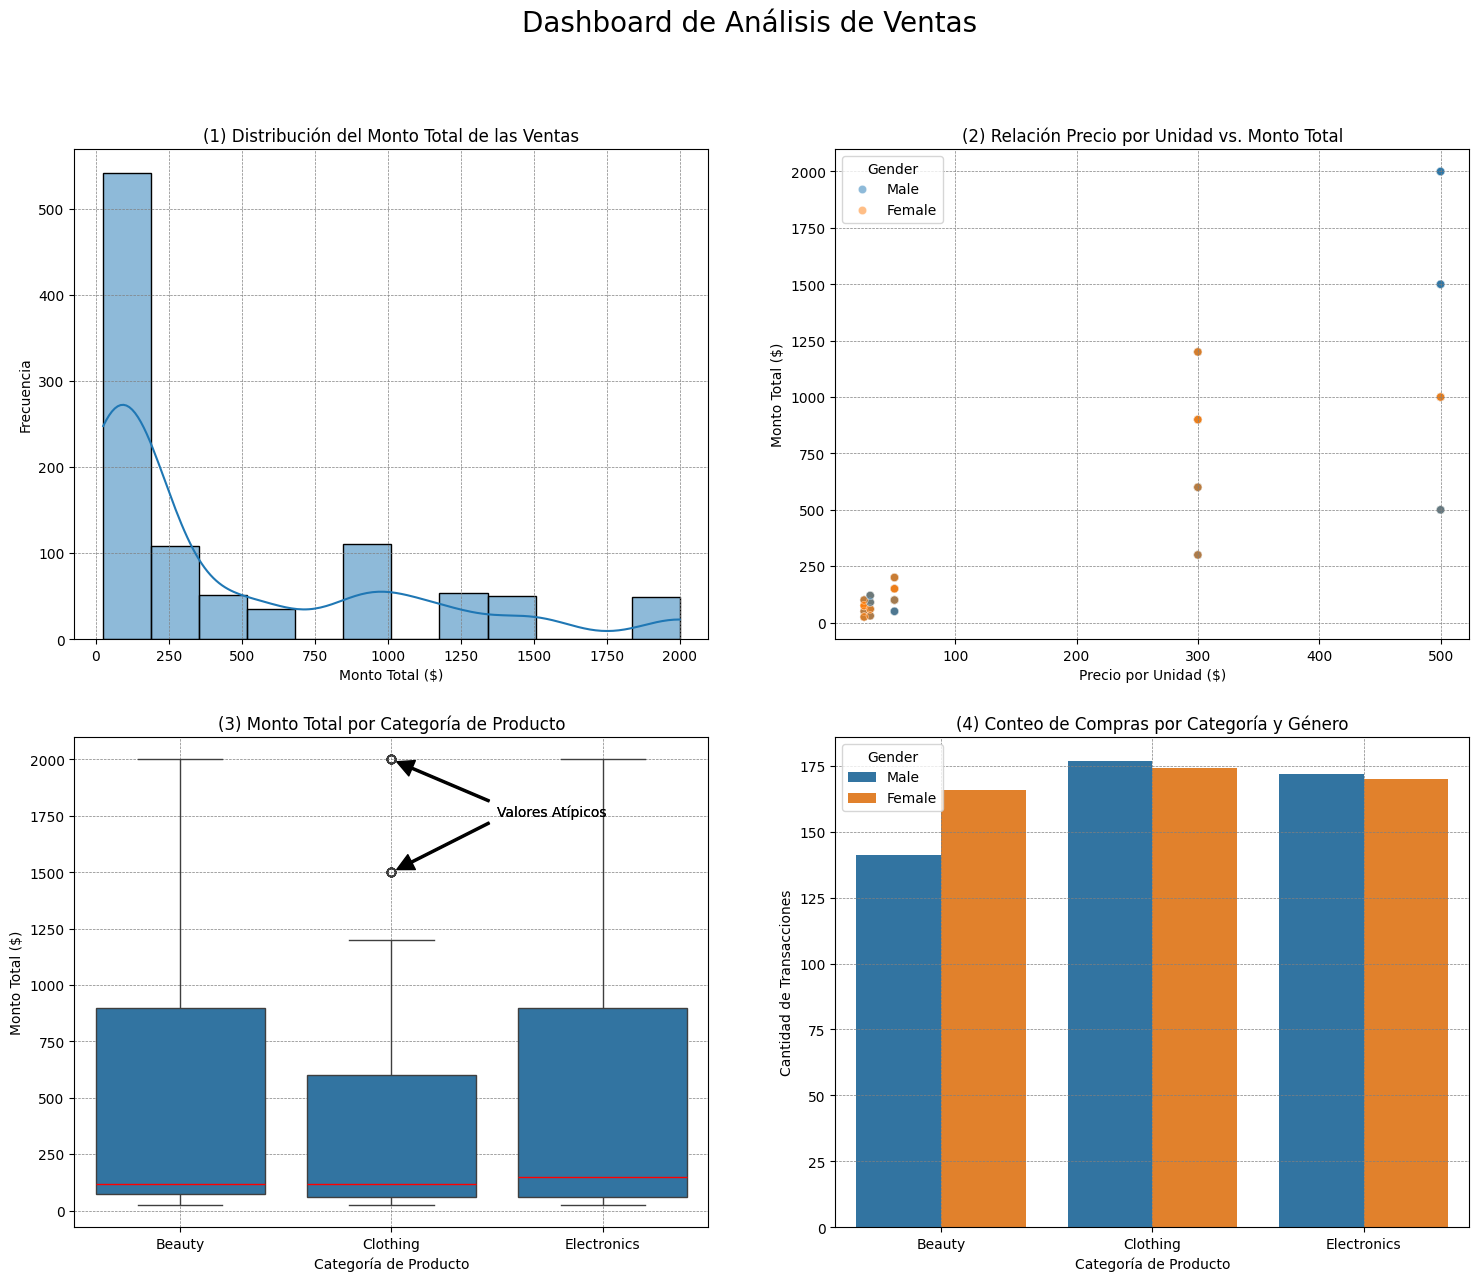

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Dashboard de Análisis de Ventas', fontsize=20)

# Gráfico 1: Histograma de Monto Total
sns.histplot(data=df, x='Total Amount', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('(1) Distribución del Monto Total de las Ventas')
axes[0, 0].set_xlabel('Monto Total ($)')
axes[0, 0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico 2: Dispersión de Precio por Unidad vs. Monto Total
sns.scatterplot(data=df, x='Price per Unit', y='Total Amount', alpha=0.5, ax=axes[0, 1], hue='Gender')
axes[0, 1].set_title('(2) Relación Precio por Unidad vs. Monto Total')
axes[0, 1].set_xlabel('Precio por Unidad ($)')
axes[0, 1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
axes[0, 1].set_ylabel('Monto Total ($)')

# Gráfico 3: Boxplot de Monto Total por Categoría de Producto
sns.boxplot(data=df, x='Product Category', y='Total Amount', ax=axes[1, 0], medianprops=dict(color='red'))
axes[1, 0].set_title('(3) Monto Total por Categoría de Producto')
axes[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
axes[1, 0].set_xlabel('Categoría de Producto')
axes[1, 0].set_ylabel('Monto Total ($)')

axes[1, 0].annotate(
    f'Valores Atípicos',
    xy=(1, 1500),
    xytext=(1.5, 1750),
    arrowprops=dict(
        facecolor='black',
        shrink=0.05,
        edgecolor='black',
        width=1.5
    ),
)

axes[1, 0].annotate(
    f'Valores Atípicos',
    xy=(1, 2000),
    xytext=(1.5, 1750),
    arrowprops=dict(
        facecolor='black',
        shrink=0.05,
        edgecolor='black',
        width=1.5
    ),
)
# Gráfico 4: Conteo de Compras por Categoría y Género
sns.countplot(data=df, x='Product Category', hue='Gender', ax=axes[1, 1])
axes[1, 1].set_title('(4) Conteo de Compras por Categoría y Género')
axes[1, 1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
axes[1, 1].set_xlabel('Categoría de Producto')
axes[1, 1].set_ylabel('Cantidad de Transacciones')

plt.show()

Del gráfico 1 se observa que el total de ventas que predomina por cada cliente es de 200 dolares aprox. A medida que aumenta el precio, la cantidad de total de ventas tiende a disminuir. Del gráfico 2 se observa que existe un mayor conjunto de puntos en la parte inferior izquierda del gráfico y a medida que se alejan a la derecha y hacia arriba, estos tienden a dispersarse más. Esto ocurre ya que dentro del "monto total" podrían ir incluidos 1 o más productos del mismo precio, haciendo que para un mismo valor de producto, exista una dispersión amplia por el eje "y". Del gráfico 3 podemos observar que la media del monto total vendido en las 3 categorías es cercana a 100 dolares aprox, teniendo como minimo valores cercanos a 20 dolates. Para el caso de la categoría "Clothing", se observan dos valores atípicos, uno cercano a 1500 dolares y el otro cercano a los 2000. A su vez observamos que el monto total vendido de categoria "Beauty" fluctúa entre los 40 dolares aprox, hasta cerca de 800 dolares. Para el caso de "Clothing", este fluctúa entre los 20 dolares y los 600 dolares aprox, y para el caso de "Electronics" este varía entre los 20 dolares y los 800.

Para el caso del gráfico 4, se observa que para categorías "Beauty" el género Femenino realiza mayor cantidad de transacciones que el género Masculino. Por otro lado, la categoría "Clothing" tiene cantidades de transacciones muy similares, al igual que "Electronics".